<a href="https://colab.research.google.com/github/hellocybernetics/TensorFlow_Eager_Execution_Tutorials/blob/master/tutorials/01_basics/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

tf.enable_eager_execution()

In [0]:
tfe = tf.contrib.eager
tfk = tf.keras

In [8]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)


# data.shape is (batch_size, data_dimension)
print(x_train.shape)

(15, 1)


In [0]:
# Linear regression model
model = tfk.layers.Dense(output_size)

# loss function
def loss_fn(model, x, y):
    predict_y = model(x)
    return tf.keras.losses.mean_squared_error(predict_y, y)

# prepare auto diff
value_and_grads = tf.contrib.eager.implicit_value_and_gradients(loss_fn)

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-4)

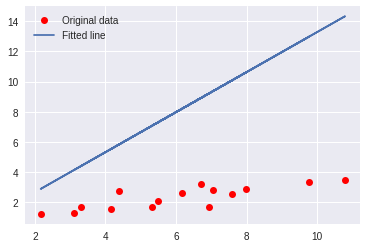

In [27]:
x_train_ = tf.convert_to_tensor(x_train)
y_train_ = tf.convert_to_tensor(y_train)

# Plot the graph
predicted = model(x_train_).numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

In [28]:



for epoch in range(num_epochs):
    loss, grads = value_and_grads(model=model, x=x_train_, y=y_train_)
    
    if (epoch+1) % 5 == 0:
        print("loss: ", tf.reduce_sum(loss).numpy())

    # update prameters using grads
    optimizer.apply_gradients(grads)

loss:  197.18375
loss:  52.25621
loss:  16.080078
loss:  7.0466995
loss:  4.787751
loss:  4.2196155
loss:  4.073498
loss:  4.0327253
loss:  4.0182624
loss:  4.010383
loss:  4.004162
loss:  3.9983728


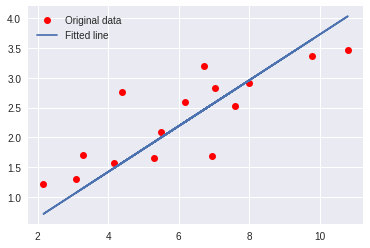

In [29]:
# Plot the graph
predicted = model(x_train_).numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()
